<a href="https://colab.research.google.com/github/LaxmanGhadi/ColabProjectsBeginners/blob/main/DL_Project_7_Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from keras.preprocessing.image import  ImageDataGenerator
from  keras.layers import Dense, Flatten
from keras.models import Model
import keras
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:42<00:00, 24.7MB/s]
100% 2.29G/2.29G [01:42<00:00, 24.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
list_dir = os.listdir('/content/chest_xray/train/PNEUMONIA')

In [ ]:
len(list_dir)

3875

In [ ]:
path = '/content/chest_xray/train/PNEUMONIA/person1068_bacteria_3002.jpeg'
image = imread(path)

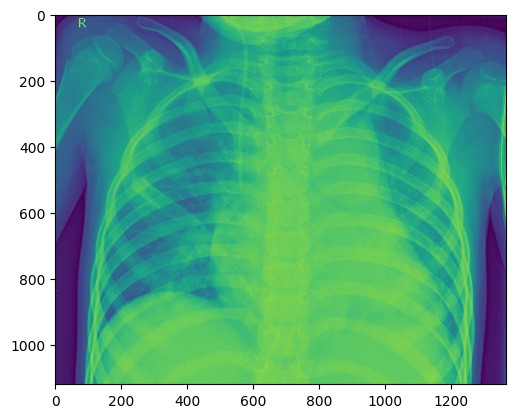

In [ ]:
plt.imshow(image)

In [ ]:
IMG_SIZE = (384, 384)

datagen  = ImageDataGenerator(samplewise_center=False,
                                    samplewise_std_normalization=False,
                                    horizontal_flip=True,
                                    vertical_flip = False,
                                    height_shift_range=0.15,
                                    width_shift_range =0.15,
                                    rotation_range  = 5,
                                    shear_range  = 0.01,
                                    fill_mode = 'nearest',
                                    zoom_range=0.25,
                                    preprocessing_function = preprocess_input
                                    )

In [ ]:
train_gen = datagen.flow_from_directory(directory ='/content/chest_xray/train',
                                        target_size =(384,384),
                                        color_mode = 'rgb',
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        seed = 2019)

Found 5216 images belonging to 2 classes.


In [ ]:
test_gen = datagen.flow_from_directory(directory ='/content/chest_xray/test',
                                        target_size =(384,384),
                                        color_mode = 'rgb',
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        seed = 2019)

Found 624 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
base_model = VGG19(input_shape= (384, 384,3), include_top=False)

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 384, 384, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 384, 384, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 384, 384, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 192, 192, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 192, 192, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 192, 192, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 96, 96, 128)       0     

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units = 2  , activation = 'sigmoid')(X)
model = Model(base_model.input,X)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 384, 384, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 384, 384, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 384, 384, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 192, 192, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 192, 192, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 192, 192, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 96, 96, 128)       0   

In [ ]:
model.compile(optimizer  = 'adam', loss =  keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

Er_Stp = EarlyStopping(monitor ='val_accuracy', min_delta = 0.1 , patience =3 ,verbose =1)

Mod_Chk_pt = ModelCheckpoint(filepath = 'pn_model.h5',
                             monitor ='val_accuracy',
                             min_delta =0.1 , patience = 3,
                             verbose = 1,
                             save_best_only = True)

In [ ]:
cal_bks = [Er_Stp,Mod_Chk_pt]

In [ ]:
history = model.fit_generator(train_gen ,
                              epochs = 20,
                              steps_per_epoch = 16,
                              verbose = 1,
                              callbacks = cal_bks,
                              validation_data = test_gen,
                              validation_steps = 16)

<ipython-input-48-ecd715621693>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen ,


Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 8.4626 - accuracy: 0.7832
Epoch 1: val_accuracy improved from -inf to 0.85938, saving model to pn_model.h5
16/16 [==============================] - 88s 4s/step - loss: 8.4626 - accuracy: 0.7832 - val_loss: 5.8132 - val_accuracy: 0.8594
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 3.2422 - accuracy: 0.9199
Epoch 2: val_accuracy did not improve from 0.85938
16/16 [==============================] - 65s 4s/step - loss: 3.2422 - accuracy: 0.9199 - val_loss: 8.3857 - val_accuracy: 0.8457
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 5.4633 - accuracy: 0.9023
Epoch 3: val_accuracy did not improve from 0.85938
16/16 [==============================] - 50s 3s/step - loss: 5.4633 - accuracy: 0.9023 - val_loss: 7.9502 - val_accuracy: 0.8496
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 2.3938 - accuracy: 0.9434
Epoch 4: val_accuracy improved from 0.85938 to 0.86328

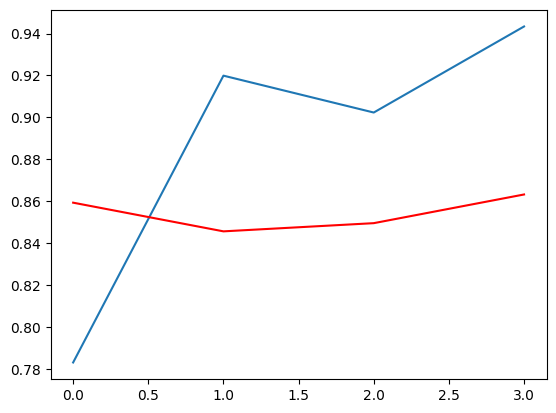

In [ ]:
his_plot  = history.history
his_plot.keys()


plt.plot(his_plot['accuracy'])
plt.plot(his_plot['val_accuracy'], c = 'red')
plt.title = ("acc vs val_acc")
plt.show()

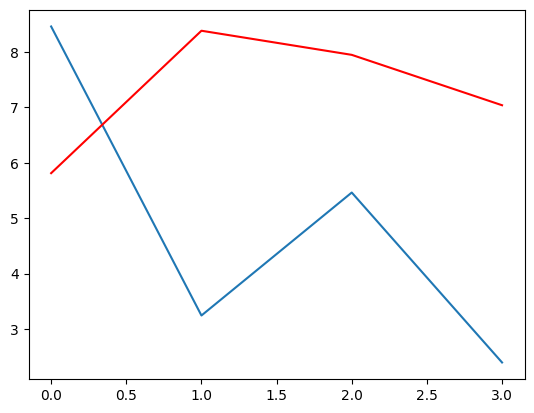

In [ ]:
plt.plot(his_plot['loss'])
plt.plot(his_plot['val_loss'], c = 'red')
plt.title = ("loss vs val_loss")
plt.show()

In [ ]:
from keras.models import load_model
model = load_model("/content/pn_model.h5")

In [ ]:
import pickle

In [ ]:
with open('PNEUMONIA','wb') as f:
  pickle.dump(model,f)

In [ ]:
from tensorflow.keras.utils import img_to_array, load_img

In [ ]:
def prediction(path):
  img  = load_img(path, target_size = (384,384) )
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(f"the image is of a {ref[pred]}")

In [ ]:
path = input("")
prediction(path)

/content/chest_xray/test/PNEUMONIA/person100_bacteria_481.jpeg
1/1 [==============================] - 0s 37ms/step
the image is of a PNEUMONIA


In [ ]:
ref = dict(zip(list(train_gen.class_indices.values()),list(train_gen.class_indices.keys())))